mpmath.sumem(f, interval, tol=None, reject=10, integral=None, adiffs=None, bdiffs=None, verbose=False, error=False, _fast_abort=False)

Uses the Euler-Maclaurin formula to compute an approximation accurate to within tol (which defaults to the present epsilon) of the sum

In [1]:
def test_mpmath_sumem(f, a, b = None):
    # https://mpmath.org/doc/current/calculus/sums_limits.html
    from mpmath import sumem, mp
    mp.dps = 50; mp.pretty = True
    if None == b:
        b = mp.inf
    return sumem(f, [a, b])

In [2]:
fn = 1/x^2
f = lambda x: 1/x^2
a = 1 #https://en.wikipedia.org/wiki/Basel_problem
p = 2

In [3]:
test_mpmath_sumem(f, 2) - test_mpmath_sumem(f, 3)

0.24985622564069066126679295403575238966185468243081

In [4]:
test_mpmath_sumem(f, a)

1.6333333333333333333333333333333333333333333333333

In [5]:
#I = mpf(1)/a
#I

$${\displaystyle \sum _{i=a}^{b}f(i)=\int _{a}^{b}f(x)\,dx+{\frac {f(a)+f(b)}{2}}+\sum _{k=1}^{\lfloor p/2\rfloor }{\frac {B_{2k}}{(2k)!}}(f^{(2k-1)}(b)-f^{(2k-1)}(a))+R_{p},}$$

$${\displaystyle P_{k}(x)=B_{k}(x-\lfloor x\rfloor ),}$$

$${\displaystyle R_{p}=(-1)^{p+1}\int _{a}^{b}f^{(p)}(x){\frac {P_{p}(x)}{p!}}\,dx.}$$

In [6]:
[k for k in range(1,1+int(p/2))]

[1]

In [7]:
D = adiffs=((-1)**n*fac(k+1)*a**(-2-k) for k in range(1,1+int(p/2)))
D

<generator object <genexpr> at 0x7f65c1a3f200>

In [8]:
# array of derivatives dfdn of different degree in the point a 
dfdx = [fn.diff(x,k) for k in range(1,1+int(p/2))]
dfdx

[-2/x^3]

In [9]:
# array of derivatives dfdn of different degree in the point a 
dfdx_a = [(fn.diff(x,k)).subs(x == a) for k in range(1,1+int(p/2))]
dfdx_a

[-2]

In [10]:
# array of derivatives dfdn of different degree in the point a 
#dfdx_a = [(-1)^n*fac(n+1)*a^(-2-n) for n in range(999)]
#dfdx_a

In [11]:
# array of derivatives dfdn of different degree in the point b 
#dfdx_b = [(-1)^n*fac(n+1)*b^(-2-n) for n in range(999)]
#dfdx_b

In [12]:
#dfdx_a[0]

$${\frac {B_{2k}}{(2k)!}}(f^{(2k-1)}(a))$$

$$\sum _{k=1}^{\lfloor p/2\rfloor }{\frac {B_{2k}}{(2k)!}}(f^{(2k-1)}(a))$$

In [13]:
[2*k-1 for k in range(1,1+int(p/2))]

[1]

In [14]:
[(fn.diff(x,2*k-1)).subs(x == a)*(bernoulli(2*k)/factorial(2*k)) for k in range(1,1+int(p/2))]

[-1/6]

In [15]:
sum_dfdx_a_bernoullis = sum([(fn.diff(x,2*k-1)).subs(x == a)*(bernoulli(2*k)/factorial(2*k)) for k in range(1,1+int(p/2))])
sum_dfdx_a_bernoullis

-1/6

In [16]:
#sumem(f, [a, inf], integral=I, adiffs=D)

In [17]:
integral(fn, x)

-1/x

In [18]:
- integral(fn, x).subs(x == a)

1

In [19]:
#integrate(1/x^2, (x, a, b))
#int_f = (-1/b)-(-1/a)
int_f = - integral(fn, x).subs(x == a)
int_f

1

In [20]:
(1/a).n()

1.00000000000000

In [21]:
f(a)

1

In [22]:
#f(b)

In [23]:
#(f(a)+f(b))/2

In [24]:
#int_f+(f(a)+f(b))/2

In [25]:
sum_dfdx_a_bernoullis = lambda _p : sum([(fn.diff(x,2*k-1)).subs(x == a)*(bernoulli(2*k)/factorial(2*k)) for k in range(1,1+int(_p/2))])

In [26]:
sum_dfdx_a_bernoullis(p)

-1/6

In [27]:
#sumem(f, [a, b]) - (int_f+(f(a)+f(b))/2)

In [28]:
for pp in range(3,p):
    print(pp, test_mpmath_sumem(f, a) - (int_f+(f(a))/2)-sum_dfdx_a_bernoullis(2*pp))

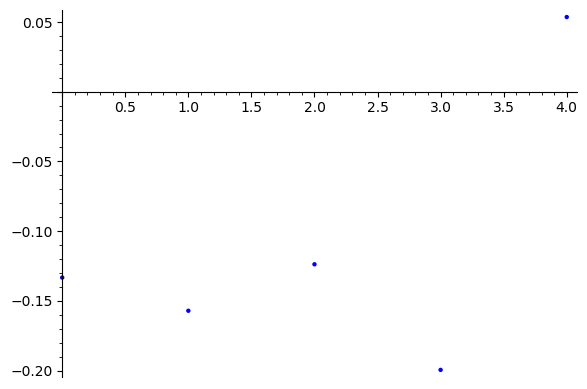

In [29]:
list_plot([sum_dfdx_a_bernoullis(2*pp) for pp in range(2,7)])

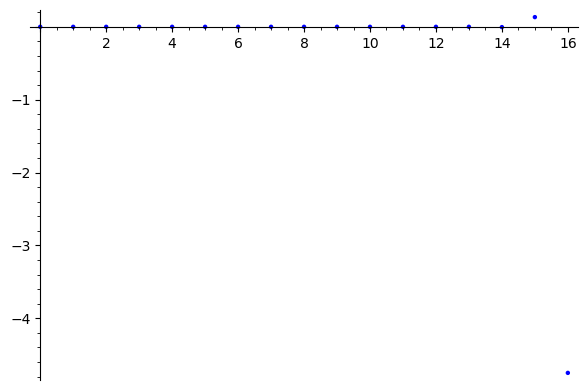

In [30]:
list_plot([sum_dfdx_a_bernoullis(2*pp) for pp in range(3,20)])

In [31]:
#list_plot([sum_dfdx_a_bernoullis(2*pp) for pp in range(3,600)])

In [32]:
test_mpmath_sumem(f, a) - (int_f)

0.63333333333333333333333333333333333333333333333333

In [33]:
sum([(-1)^n*factorial(n+1)*a^(-2-n)*(bernoulli(2*n)/factorial(2*n)) for n in range(p)])

5/6

In [34]:
P = lambda x, _p : bernoulli_polynomial(x - floor(x), _p)
B = lambda x, _p : bernoulli_polynomial(x, _p)

In [35]:
P(3.1, 5)

-0.0152400000000000

In [36]:
B(0.1, 5)

-0.0152400000000000

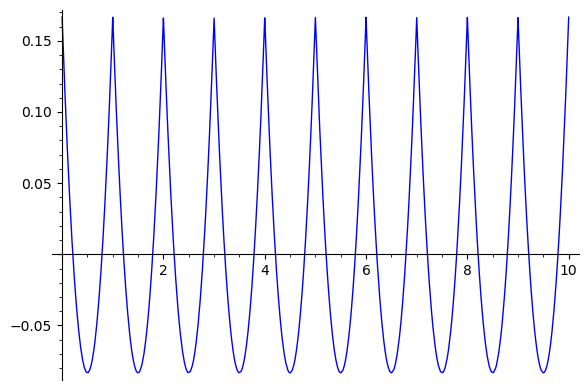

In [37]:
plot(P(x, p), x, 0, 10)

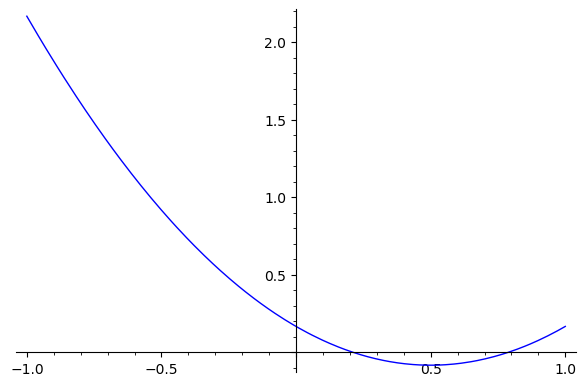

In [38]:
plot(bernoulli_polynomial(x, p))

$${\displaystyle R_{p}=(-1)^{p+1}\int _{a}^{b}f^{(p)}(x){\frac {P_{p}(x)}{p!}}\,dx.}$$

In [39]:
int_R_p = (-1)^(p+1)*integral(fn.diff(x,p)*P(x,p)/factorial(p), x)
int_R_p

3/x - 3/2/x^2 + 1/6/x^3 - 1/2*integrate(-12*floor(x)/x^3 + 6*floor(x)^2/x^4 + 6*floor(x)/x^4, x)

In [40]:
from IPython.display import display, Math, Latex
display(Math(latex(int_R_p)))

<IPython.core.display.Math object>

$${\displaystyle R_{p}=(-1)^{p+1}\sum_{j=a}^{b-1} \int _{0}^{1}f^{(p)}(u+j){\frac {B_{p}(u)}{p!}}\,du.}$$

In [41]:
#(-1)^(p+1)*
u, j = var("u, j")
int_R_p_j = lambda u, j : integral(fn.diff(x,p).subs(x == u+j) * B(u,p)/factorial(p), u)
display(Math(latex(int_R_p_j(u, j))))

<IPython.core.display.Math object>

In [42]:
display(Math(latex(int_R_p_j(u, j).subs(u==0))))

<IPython.core.display.Math object>

In [43]:
display(Math(latex(int_R_p_j(u, j).subs(u==1))))

<IPython.core.display.Math object>

In [44]:
int_R_p = lambda j : (int_R_p_j(u, j).subs(u==1)-int_R_p_j(u, j).subs(u==0)).full_simplify()
display(Math(latex(int_R_p(j))))

<IPython.core.display.Math object>

In [45]:
display(Math(latex((int_R_p_j(u, j).subs(u==1)-int_R_p_j(u, j).subs(u==0)).full_simplify())))

<IPython.core.display.Math object>

In [46]:
display(Math(latex(int_R_p(j))))

<IPython.core.display.Math object>

In [47]:
display(Math(latex(int_R_p(1))))

<IPython.core.display.Math object>

In [48]:
display(Math(latex(int_R_p(2))))

<IPython.core.display.Math object>

In [49]:
display(Math(latex(int_R_p(3))))

<IPython.core.display.Math object>

In [50]:
R_p = (-1)^(p+1)*sum(int_R_p(j), j, a, Infinity)
R_p

1/6*pi^2 - 5/3

In [51]:
int_f+(f(a))/2-sum_dfdx_a_bernoullis(p)

5/3

In [52]:
(int_f+(f(a))/2-sum_dfdx_a_bernoullis(p)).n()

1.66666666666667

In [53]:
int_f+(f(a))/2-sum_dfdx_a_bernoullis(p)+R_p

1/6*pi^2

In [54]:
(int_f+(f(a))/2-sum_dfdx_a_bernoullis(p)+R_p).n()

1.64493406684823

In [55]:
test_mpmath_sumem(f, a)

1.6333333333333333333333333333333333333333333333333

In [56]:
logging = False

calc_R_p=True
use_int_R_p_j=True
change_R_p_order=False
use_int_R_p_shifted_first = True

def my_euler_maclaurin(f,symb,a,b,p, hold_int=True, hold_sum=True):
    if logging:
        print("f", f(symb))
        print("symb,a,b", symb, a, b)
        print("")
    #sum_dfdx_a_bernoullis = lambda _a : sum([(f.diff(x,k-1)).subs(x == _a)*(bernoulli(k)/factorial(k)) for k in range(1,1+p)])
    sum_dfdx_a_bernoullis = sum([(f.diff(symb,k-1))*(bernoulli(k)/factorial(k)) for k in range(1,1+p)])
    
    if logging:
        print("sum_dfdx_a_bernoullis ", sum_dfdx_a_bernoullis)

    if True:
        B = lambda x, p : bernoulli_polynomial(x, p)
        P = lambda x, p : bernoulli_polynomial(x - floor(x), p)
        fact = lambda n : factorial(n)
    else:
        B = function("B")(x,p)
        P = function("P")(x,p)
        fact = function("fact")(n)
        
    if True == calc_R_p:
        
        v = var("v")
        
        if use_int_R_p_j:
            
            j = var("j")
            assume(j>0)
            if change_R_p_order:
                # Change order of summation and integration
                if use_int_R_p_shifted_first:
                    R_p = (-1)^(p+1)*integral(sum(f.subs(symb == v+j).diff(v,p)*B(x=v,p=p)/fact(n=p), \
                                                  j, a, b-1, hold=hold_sum), \
                                              (v,0,1), hold=hold_int)
                else:
                    R_p = (-1)^(p+1)*integral(sum(f.diff(symb,p).subs(symb == v+j)*B(x=v,p=p)/fact(n=p), \
                                                  j, a, b-1, hold=hold_sum), \
                                              (v,0,1), hold=hold_int)
            else:
                def int_R_p(f, symb, j):
                    deriv = f.diff(symb,p)
                    if logging:
                        print("deriv", deriv)
                    deriv_s = deriv.subs(symb == v+j)
                    if logging:
                        print("deriv_s", deriv_s)
                    int_f_diff_B_fact = integral(deriv_s * B(x=v,p=p)/fact(n=p), (v,0,1), hold=hold_int)
                    
                    if logging:
                        print("int_f_diff_B_fact", int_f_diff_B_fact)
                        
                    return int_f_diff_B_fact

                def int_R_p_shifted_first(f, symb, j):
                    f_shifted = f.subs(symb == v + j)
                    if logging:
                        print("f_shifted", f_shifted)
                    deriv = f_shifted.diff(v,p)
                    if logging:
                        print("deriv", deriv)
                    int_f_diff_B_fact = integral(deriv * B(x=v,p=p)/fact(n=p), (v,0,1), hold=hold_int)
                    if logging:
                        print("int_f_diff_B_fact", int_f_diff_B_fact)
                    return int_f_diff_B_fact

                if use_int_R_p_shifted_first:
                    R_p = (-1)^(p+1)*sum(int_R_p_shifted_first(f=f, symb=symb, j=j), j, a, b-1, hold=hold_sum)
                else:
                    R_p = (-1)^(p+1)*sum(int_R_p(f=f, symb=symb, j=j), j, a, b-1, hold=hold_sum)
        else:
            R_p = (-1)^(p+1)*integral(f.diff(symb,p) * P(x=x,p=p)/fact(n=p),(symb,a,b), hold=hold_int)
    
    int_f_a_b = integral(f, (x, a, b))
    
    if logging:
        print("int_f_a_b", int_f_a_b)
        
    s = int_f_a_b
    if 0 != sum_dfdx_a_bernoullis:
        s+= sum_dfdx_a_bernoullis.subs(symb == b) - sum_dfdx_a_bernoullis.subs(symb == a)
    if True == calc_R_p:
        s += R_p
    if logging:
        print(f(x=a))
        print(f(x=b))
        if 0 != sum_dfdx_a_bernoullis:
            print("sum_dfdx_a_bernoullis(a)", sum_dfdx_a_bernoullis.subs(symb == a))
            print("sum_dfdx_a_bernoullis(b)", sum_dfdx_a_bernoullis.subs(symb == b))
        if True == calc_R_p:
            print("R_p", R_p)
        print("s", s)
    return s

In [70]:
F = function("F")(x)
p = 4

In [71]:
use_int_R_p_j=False
change_R_p_order=False
use_int_R_p_shifted_first = True

ans = my_euler_maclaurin(f=F, symb=x, a=a, b=Infinity, p=p)
print(ans)
display(Math(latex(ans)))

ans = my_euler_maclaurin(f=fn, symb=x, a=a, b=Infinity, p=p)
display(Math(latex(ans)))
display(Math(latex(ans.n())))

1/2*F(1) - 1/2*F(+Infinity) - integrate(1/720*(30*(x - floor(x))^4 - 60*(x - floor(x))^3 + 30*(x - floor(x))^2 - 1)*diff(F(x), x, x, x, x), x, 1, +Infinity) + integrate(F(x), x, 1, +Infinity) - 1/12*D[0](F)(1) + 1/720*D[0, 0, 0](F)(1) + 1/12*D[0](F)(+Infinity) - 1/720*D[0, 0, 0](F)(+Infinity)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [60]:
use_int_R_p_j=True
change_R_p_order=False
use_int_R_p_shifted_first = True

ans = my_euler_maclaurin(f=F, symb=x, a=a, b=Infinity, p=p)
display(Math(latex(ans)))

ans = my_euler_maclaurin(f=fn, symb=x, a=a, b=Infinity, p=p)
display(Math(latex(ans)))
#display(Math(latex(ans.n())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [61]:
use_int_R_p_j=True
change_R_p_order=False
use_int_R_p_shifted_first = True

ans = my_euler_maclaurin(f=F, symb=x, a=a, b=Infinity, p=p)
display(Math(latex(ans)))

ans = my_euler_maclaurin(f=fn, symb=x, a=a, b=Infinity, p=p, hold_int=False)
display(Math(latex(ans)))
#display(Math(latex(ans.n())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [62]:
use_int_R_p_j=True
change_R_p_order=False
use_int_R_p_shifted_first = True

ans = my_euler_maclaurin(f=F, symb=x, a=a, b=Infinity, p=p)
display(Math(latex(ans)))

ans = my_euler_maclaurin(f=fn, symb=x, a=a, b=Infinity, p=p, hold_int=False, hold_sum=False)
display(Math(latex(ans)))
display(Math(latex(ans.n())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [63]:
use_int_R_p_j=True
change_R_p_order=True
use_int_R_p_shifted_first = True

ans = my_euler_maclaurin(f=F, symb=x, a=a, b=Infinity, p=p)
display(Math(latex(ans)))

ans_ch = my_euler_maclaurin(fn, x, a, Infinity, p)
display(Math(latex(ans_ch)))
#display(Math(latex(((ans_ch).n()))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [64]:
use_int_R_p_j=True
change_R_p_order=True
use_int_R_p_shifted_first = False

ans = my_euler_maclaurin(f=F, symb=x, a=a, b=Infinity, p=p)
display(Math(latex(ans)))

ans_ch = my_euler_maclaurin(fn, x, a, Infinity, p, hold_int=False)
display(Math(latex(ans_ch)))
#display(Math(latex(((ans_ch).n()))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [68]:
use_int_R_p_j=True
change_R_p_order=False
use_int_R_p_shifted_first = False

ans = my_euler_maclaurin(f=F, symb=x, a=a, b=Infinity, p=p)
print(ans)
display(Math(latex(ans)))

ans_ch = my_euler_maclaurin(fn, x, a, Infinity, p, hold_int=False)
display(Math(latex(ans_ch)))
#display(Math(latex(((ans_ch).n()))))

1/2*F(1) - 1/2*F(+Infinity) + integrate(F(x), x, 1, +Infinity) + sum(integrate(1/2*(2*v - 1)*D[0](F)(j + v), v, 0, 1), j, 1, +Infinity)


<IPython.core.display.Math object>

<IPython.core.display.Math object>